<a href="https://colab.research.google.com/github/mikee254/mikee254/blob/main/milestone_pproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning

we are going to use the following approach

1Problem definition

2data

3 evaluation

4 featuters

5 modelling

6 experimentation

# Problem definition

given clinical parameters about a patient,we can predict whether the patient has heart_disease or not

2 **Data**

the original data came from cleavland data from the UCI ML repository
 https://archive.ics.uci.edu/dataset/45/heart+disease

there is also a version of it available on kaggle

3 **Evaluation**

if we can reach 95% accuracy at predicting whether or not a patient has heartdisease during the proof of concept, we will persue the project

4 **Features**

data dictionary

1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient  (I replaced this with the dummy string "name")



In [ ]:
### preparing the tools

we are going to use pandas, matplotlib and numpy for data analysis and manipulation

In [ ]:
#  import all the tools we need
#  regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# we want our plots to appear inside the notebook
%matplotlib inline

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#  model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay # import RocCurveDisplay instead of plot_roc_curve

**load** **data**

In [ ]:
df = pd.read_csv( "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv" )
df.shape

(303, 14)

In [ ]:
## data exploration (EDA)


the goal here is to find more about the data and become a subject matter export on the data

what questions are you trying to solve

what kind of data do we have

whats missing from the data
where are the outliers

how can you add, change etc

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#  lets find how many of each class there is
df["target"].value_counts()

,count
target,
1,165
0,138


<Axes: xlabel='target'>

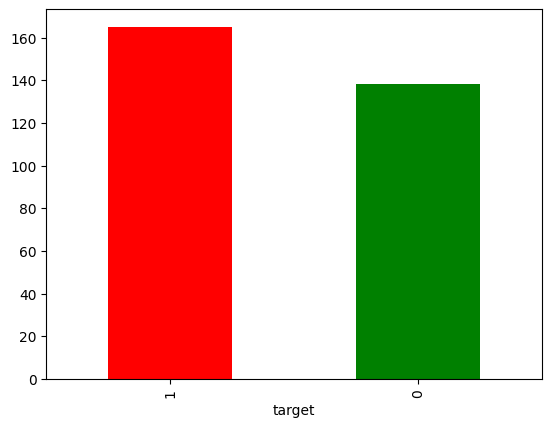

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# are there missing values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [ ]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [ ]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


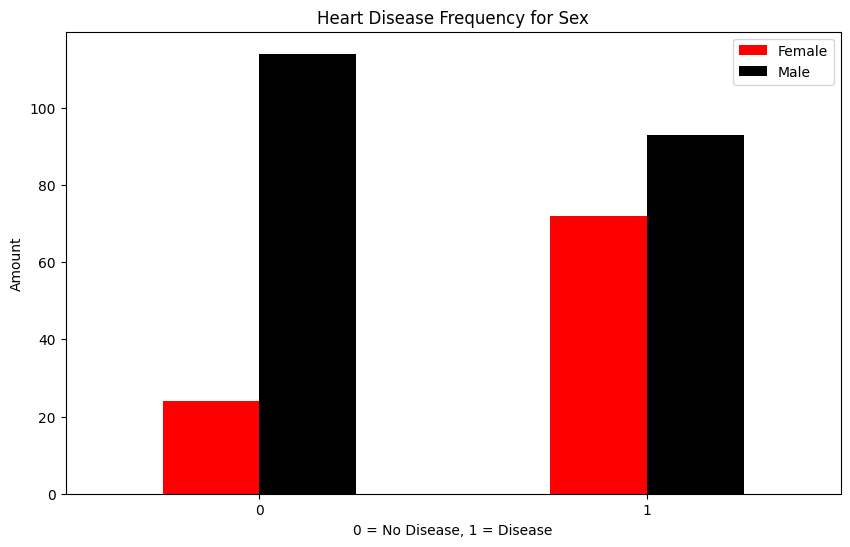

In [ ]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["red", "black"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [ ]:
df["thalach"].value_counts()

,count
thalach,
162,11
160,9
163,9
152,8
173,8
...,...
202,1
184,1
121,1


# age vs max heart rate for heart disease

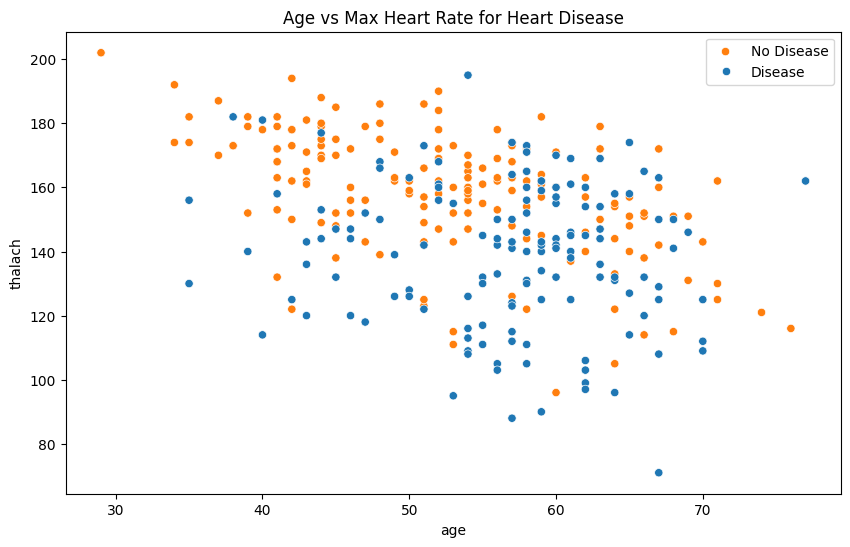

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="thalach", hue="target") # Changed y to "thalach"
plt.xticks(rotation=0)
plt.title("Age vs Max Heart Rate for Heart Disease")
plt.legend(["No Disease", "Disease"])

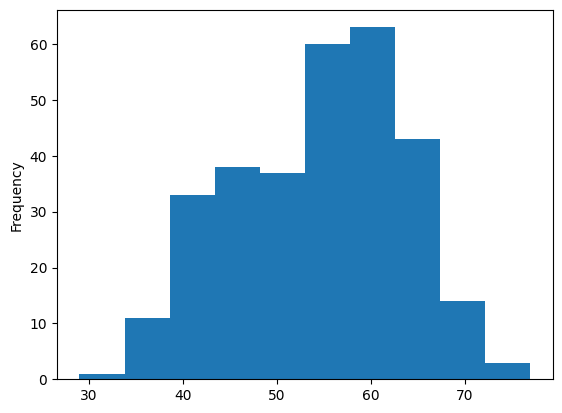

In [ ]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

In [ ]:
### heart disease frequency per chest pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


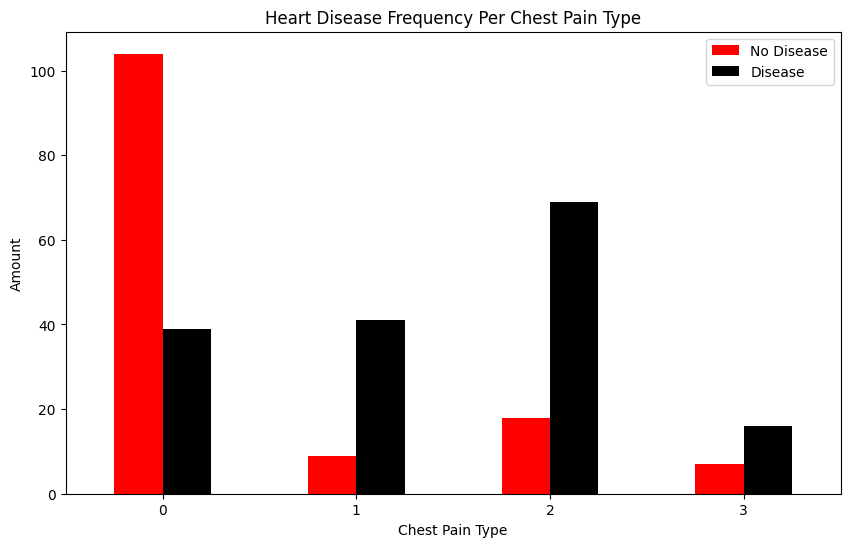

In [ ]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["red", "black"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

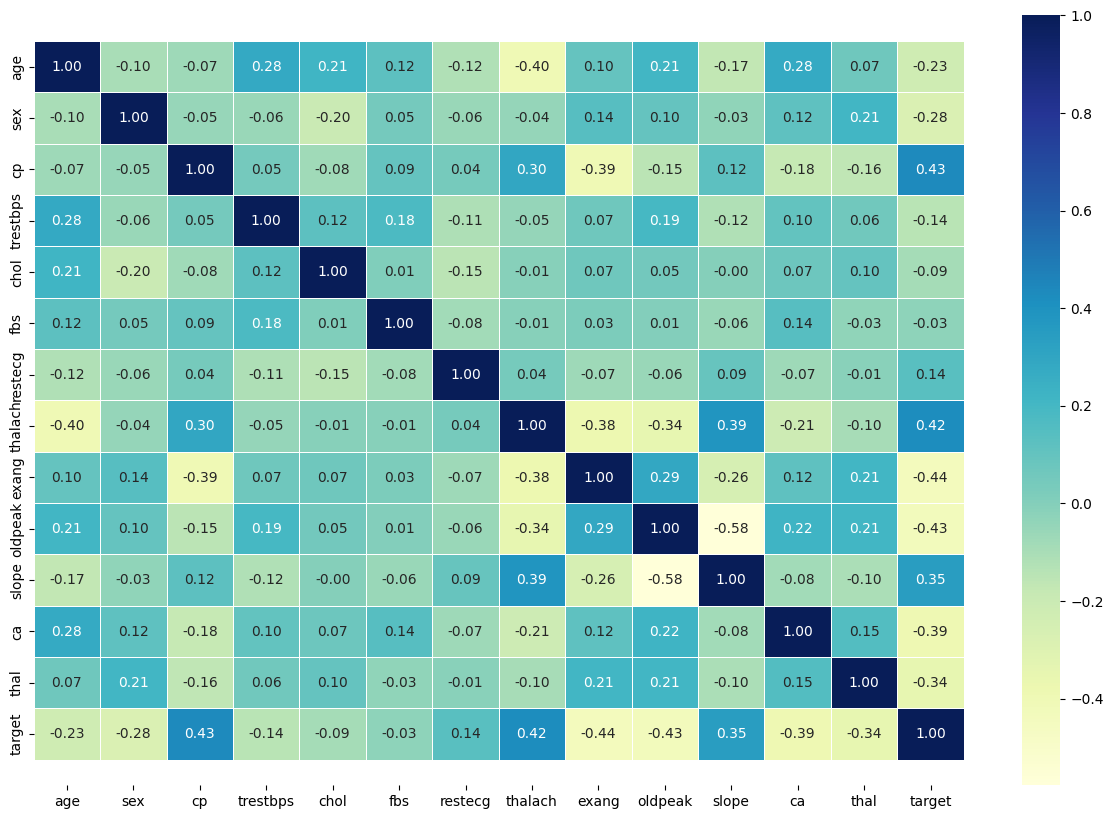

In [ ]:
# lets make our correlation more prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**### **MODELLING**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# split data into x & y
x = df.drop("target", axis=1)
y = df["target"]


In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# split data into train and test sets
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

**We are going to try 3 ML models**

1. logistic Regression

2. K-nearest neighbours classifier

3. RandomForest Classifier

In [ ]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning
    models to be fitted.
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {} #fixed indentation

# loop through models
    for name, model in models.items():

  # fit the model to the data
        model.fit(x_train, y_train) #fixed indentation

# evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test) #fixed indentation
    return model_scores #fixed indentation

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             y_train=y_train,
                             x_test=x_test,
                             y_test=y_test)
                             #removed duplicate function call
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

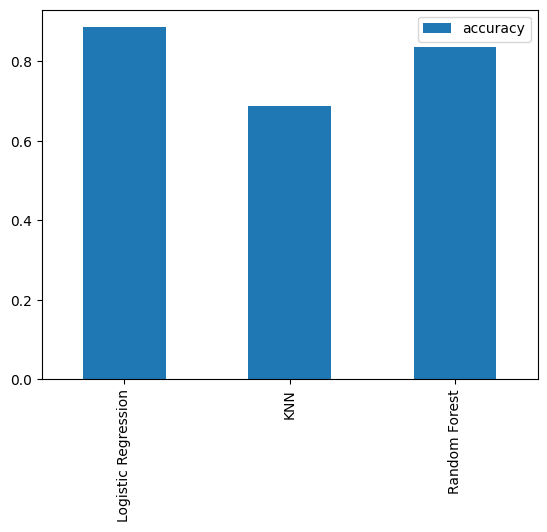

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

now we have a baseline model and we know a models first predictions arent always what we should base our next steps. what should we do?

lets look at the following
* hyperparamater tuning
* feature importance
* confusion matrix
* cross-validation
* ROC curve
* precision
* recall
* f1 score
* classification report
*area under the curve

**Hyperparameter tuning_by_hand **

In [ ]:
 # lets tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbours
neighbours = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different values of n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

  # fit the algorithm
    knn.fit(x_train, y_train)

  # update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


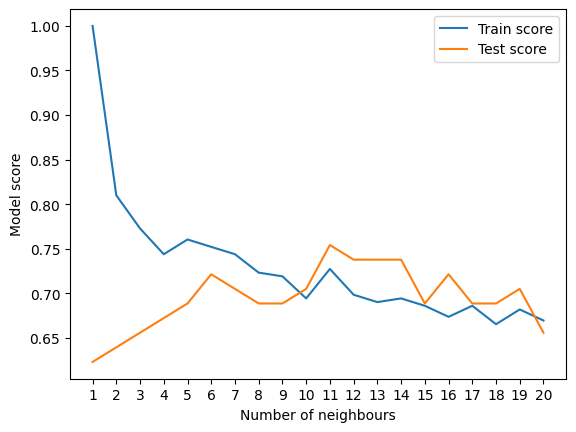

In [ ]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


**Hyperparameter tuning by RandomizedSearchCV**

we are going to tune:

*LogisticRegression

*RandomForestClassifier

....using RandomizedSearchCV

In [ ]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [ ]:
# CREATE a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
             "max_depth": [None, 3, 5, 10],
             "min_samples_split": np.arange(2, 20, 2),
             "min_samples_leaf": np.arange(1, 20, 2)}

Now we have got hyperparameter grids setup for each of our models,lets tune them using RandomizedSearchCV

In [ ]:
# Tune LogisticRegression
np.random.seed(42)
# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

now weve tuned logisticRegression lets tune randomforestclassifier
#

In [ ]:
# setup random seed
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)


0.8688524590163934

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridsearchCV

In [ ]:
# different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


In [ ]:
# setup grid hyperparameter for our LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

# EVALUATING our tuned ML Classifier, beyond accuracy
* confusion matrix
* ROC curve
* precision
* recall
* f1 score
* classification report
*area under the curve

it would be great if cross-validation was used where possible
to make comparisons and evaluate our trained models we need to make predictions

In [ ]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


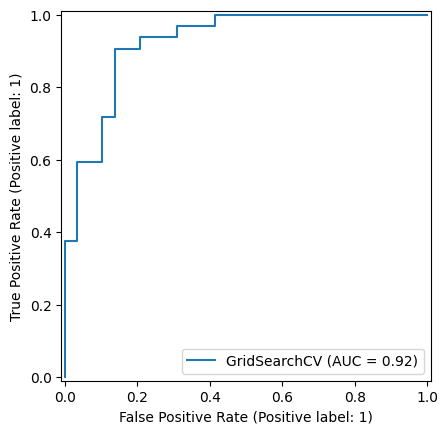

In [ ]:
# import the roc_curve function from sklearn.metrics
from sklearn.metrics import RocCurveDisplay

# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [ ]:
# confusion matrix
print (confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


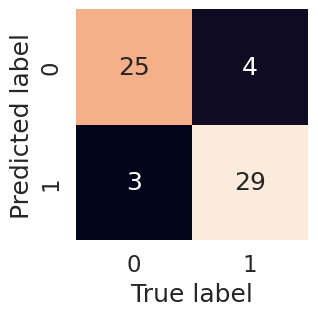

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

now we have ROC curve, confusion matrix and AUC metric, lets get a classification report as well as cross-validated precision,recall and f1-score

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation
we are going to use cross-validation to evaluate our model

In [ ]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# check a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

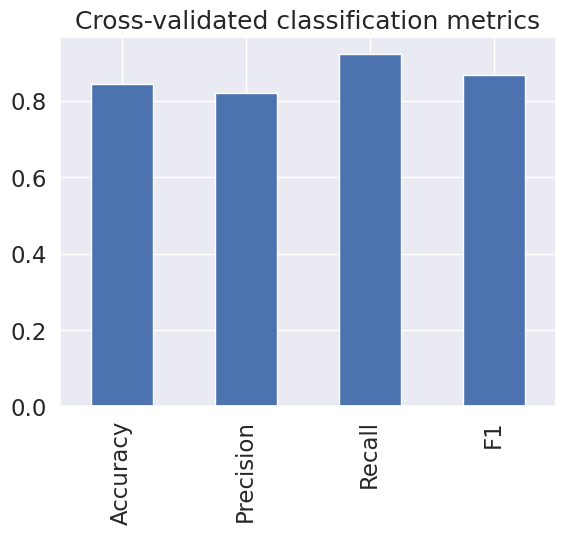

In [ ]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### feature importance

feature importance is another as asking, "which features have the most to the outcomes of the model and how did they contribute

finding feature importance is different for each ML model

lets find the feature importance for our LogisticRegression model

In [ ]:
# fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# match coef's of features to columns
feature_dict = dict(zip(x.columns, clf.coef_[0]))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'Feature Importance'}>

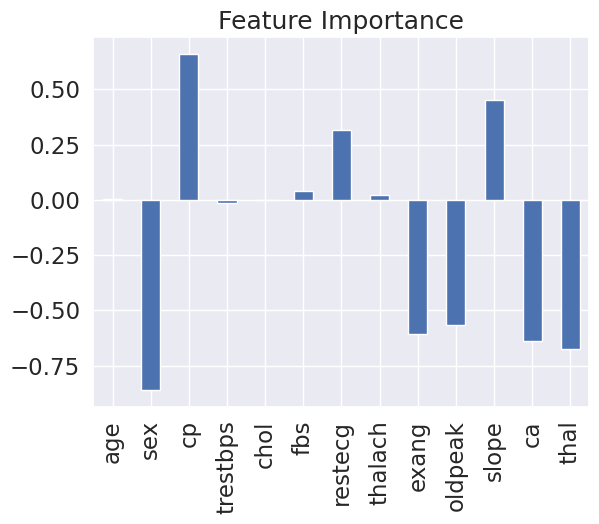

In [ ]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False)